In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

<Axes: xlabel='median_house_value', ylabel='Count'>

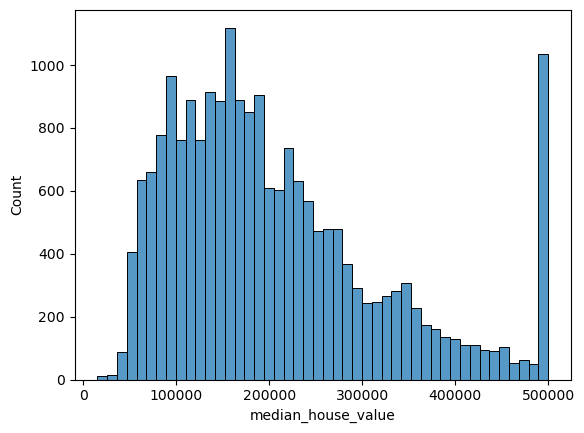

In [3]:
sns.histplot(data['median_house_value'])

In [4]:
houses_to_keep = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
columns_to_keep = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
data_to_keep = houses_to_keep[columns_to_keep]

In [5]:
# Question 1: There's one feature with missing values. What is it?

houses_to_keep.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
houses_to_keep["population"].median()

1195.0

In [7]:
np.random.seed(42)

df = houses_to_keep
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

del df_shuffled['ocean_proximity']

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [8]:
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [9]:
df_train_filledna_mean = df_train.copy()
df_train_filledna_mean['total_bedrooms'].fillna(df_train_filledna_mean['total_bedrooms'].mean(), inplace=True)
df_train_filledna_zeros = df_train.copy()
df_train_filledna_zeros['total_bedrooms'].fillna(0, inplace=True)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

0.34

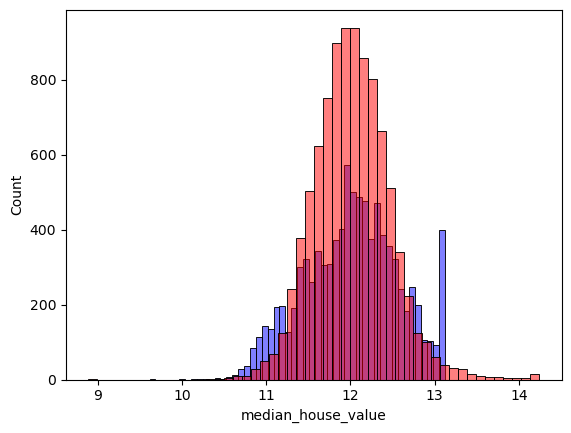

In [10]:
w0, w = train_linear_regression(df_train_filledna_mean, y_train)
y_pred_with_mean = w0 + df_train_filledna_mean.dot(w)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_with_mean, color='red', alpha=0.5, bins=50)
#score = rmse(y_train, y_pred_with_mean)
#round(score, 2)
y_pred_val = w0 + df_val.dot(w)
score = rmse(y_val, y_pred_val)
round(score, 2)

0.34

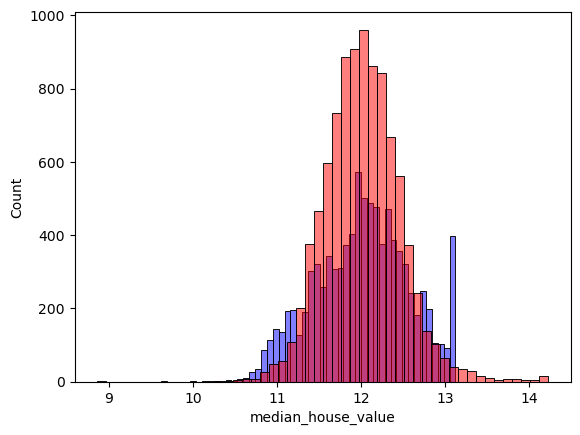

In [11]:
w0, w = train_linear_regression(df_train_filledna_zeros, y_train)
y_pred_with_zeros = w0 + df_train_filledna_zeros.dot(w)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_with_zeros, color='red', alpha=0.5, bins=50)
#score = rmse(y_train, y_pred_with_zeros)
#round(score, 2)
y_pred_val = w0 + df_val.dot(w)
score = rmse(y_val, y_pred_val)
round(score, 2)

In [12]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(df_train_filledna_zeros, y_train, r=r)
    y_pred_val = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred_val)
    print('%5s, %.2f %.2f' % (r, w0, round(score,2)))

    0, -9.76 0.34
1e-06, -9.76 0.34
0.0001, -9.76 0.34
0.001, -9.74 0.34
 0.01, -9.56 0.34
  0.1, -8.06 0.34
    1, -3.13 0.34
    5, -0.84 0.35
   10, -0.44 0.35


In [14]:
# Question 5:

def shuffle_and_split(df, seed=42):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    del df_shuffled['ocean_proximity']
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value
    y_val_orig = df_val.median_house_value
    y_test_orig = df_test.median_house_value
    
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test


In [22]:
df = houses_to_keep.copy()
df['total_bedrooms'].fillna(0, inplace=True)

scores = []

for seed in np.arange(10):
    df_train, df_val, df_test, y_train, y_val, y_test = shuffle_and_split(df,seed)
    w0, w = train_linear_regression_reg(df_train, y_train, r=r)
    y_pred_val = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred_val)
    print(f"seed: {seed};",f"score: {score}")
    scores.append(score)

# standard deviation
np.std(scores).round(3)
print(f"Standard deviation: {np.std(scores).round(3)}")

seed: 0; score: 0.3453216693554694
seed: 1; score: 0.3457306801239788
seed: 2; score: 0.3466523969255482
seed: 3; score: 0.3386232228605118
seed: 4; score: 0.34812874963859924
seed: 5; score: 0.3482110694185072
seed: 6; score: 0.34461855579919787
seed: 7; score: 0.3521629724663015
seed: 8; score: 0.3590292364671297
seed: 9; score: 0.33987999985510126
Standard deviation: 0.006


In [25]:
# Question 6 
df = houses_to_keep.copy()
df['total_bedrooms'].fillna(0, inplace=True)


df_train, df_val, df_test, y_train, y_val, y_test = shuffle_and_split(df,9)

df_train_combined = pd.concat([df_train, df_val])
df_train_combined.reset_index(drop=True)
y_train_combined = pd.concat([y_train, y_val])
y_train_combined.reset_index(drop=True)



w0, w = train_linear_regression_reg(df_train_combined, y_train_combined, r=0.001)
y_pred_test = w0 + df_test.dot(w)
score = rmse(y_test, y_pred_test)

print(f"RMSE: {round(score,2)}")

RMSE: 0.33
